In [1]:
import pandas as pd
import numpy as np

### `Loading data`

In [42]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

df_train1 = pd.read_csv("C:\\Users\\naray\\Desktop\\Case Studies\\3. Network Intrusion Detection System\\NSL_Dataset\\Train.txt",
                         sep=",", names=datacols)
df_test1=pd.read_csv("C:\\Users\\naray\\Desktop\\Case Studies\\3. Network Intrusion Detection System\\NSL_Dataset\\Test.txt",
                         sep=",", names=datacols)

df_train1['key']='train'
df_test1['key']='test'


In [43]:
df_train1.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,key
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20,train
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15,train
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19,train


In [44]:
df_test1.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,key
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21,test
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21,test
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21,test


### `Exploratory data anlysis`

In [163]:
import pandas_profiling
pandas_profiling.ProfileReport(df_train1)

Number of variables,43
Number of observations,125973
Total Missing (%),0.0%
Total size in memory,41.3 MiB
Average record size in memory,344.0 B
Numeric,26
Categorical,4
Boolean,5
Date,0
Text (Unique),0
Rejected,8


In [45]:
# Dropping duplicate rows from train and test dataframes

# df_train1.drop_duplicates(keep='last',inplace=True)
# df_test1.drop_duplicates(keep='last',inplace=True)

# Dropping variables with constant values
df_train1.drop(['num_outbound_cmds','urgent'],axis=1,inplace=True)
df_test1.drop(['num_outbound_cmds','urgent'],axis=1,inplace=True)

In [46]:
df_train1.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03
root_shell,125973.0,0.001342,3.660284e-02,0.0,0.00,0.00,0.00,1.000000e+00


In [47]:
# Difining categories of various types of attacks

di={'back':'DOS','land':'DOS','neptune':'DOS','pod':'DOS','smurf':'DOS','teardrop':'DOS','apache2':'DOS','udpstorm':'DOS','processtable':'DOS','worm':'DOS',
     'satan':'Probe','ipsweep':'Probe','nmap':'Probe','portsweep':'Probe','mscan':'Probe','saint':'Probe',
   'guess_passwd':'R2L','ftp_write':'R2L','imap':'R2L','phf':'R2L','multihop':'R2L','warezmaster':'R2L','warezclient':'R2L','spy':'R2L','xlock':'R2L','xsnoop':'R2L','snmpguess':'R2L','mailbomb':'R2L','snmpgetattack':'R2L','httptunnel':'R2L','sendmail':'R2L','named':'R2L',
   'buffer_overflow':'U2R','loadmodule':'U2R','rootkit':'U2R','perl':'U2R','sqlattack':'U2R','xterm':'U2R','ps':'U2R',
   'normal':'Normal_activity'}

df_train1['attack_type']=df_train1['attack'].map(di)
df_test1['attack_type']=df_test1['attack'].map(di)

df_train=df_train1.copy()
df_test=df_test1.copy()

df_train.drop('attack',axis=1,inplace=True)
df_test.drop('attack',axis=1,inplace=True)

In [48]:
# Difining activity - attack or normal

di1={'Normal_activity':0,'DOS':1,'Probe':1,'R2L':1,'U2R':1}

df_train['activity']=df_train['attack_type'].map(di1)
df_test['activity']=df_test['attack_type'].map(di1)

df_train.drop('attack_type',axis=1,inplace=True)
df_test.drop('attack_type',axis=1,inplace=True)

In [49]:
# Concatenating train and test dataframes
df_appended=pd.concat([df_train,df_test])
print(df_train.shape)
print(df_test.shape)
print(df_appended.shape)

(125973, 42)
(22544, 42)
(148517, 42)


### `Categorical variables treatment`

In [50]:
df_cat=df_appended.select_dtypes(include=['object'])

df_cat.drop('key',axis=1,inplace=True)

df_cat.head(3)

C:\Users\naray\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0


In [51]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

for x in ['protocol_type','service','flag']:
    df_cat[x]=df_cat[x].astype('category')
    df_cat=create_dummies(df_cat,x)

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
df_cat.shape

(148517, 81)

### `Numerical variables treatment`

In [53]:
num_vars=df_appended.columns.difference(['protocol_type','service','flag','key'])

df_num=df_appended[num_vars]

df_num.head(3)

,activity,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,...,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,wrong_fragment
0,0,2,0.00,0,150,0.03,0.05,0.17,0.17,0.0,...,0,1.00,0.0,491,2,0.0,0.0,0.0,0,0
1,0,13,0.15,0,255,0.60,0.00,0.88,0.00,0.0,...,0,0.08,0.0,146,1,0.0,0.0,0.0,0,0
2,1,123,0.07,0,255,0.05,0.00,0.00,0.10,1.0,...,0,0.05,1.0,0,6,0.0,0.0,1.0,0,0


In [55]:
# Outlier capping 

def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

df_num=df_num.apply(lambda x: outlier_capping(x))

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


##### Combining num & cat variables and bifurcating train and test datafarames

In [56]:
df=pd.concat([df_num,df_cat,df_appended['key']],axis=1)

In [57]:
df.head()

,activity,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,key
0,0,2,0.00,0.0,150,0.03,0.05,0.17,0.17,0.00,...,0,0,0,0,0,0,0,1,0,train
1,0,13,0.15,0.0,255,0.60,0.00,0.88,0.00,0.00,...,0,0,0,0,0,0,0,1,0,train
2,1,123,0.07,0.0,255,0.05,0.00,0.00,0.10,1.00,...,0,0,0,1,0,0,0,0,0,train
3,0,5,0.00,8153.0,30,0.00,0.00,0.03,1.00,0.03,...,0,0,0,0,0,0,0,1,0,train
4,0,30,0.00,420.0,255,0.00,0.00,0.00,1.00,0.00,...,0,0,0,0,0,0,0,1,0,train


In [58]:
# Splitting train and test dataframes

df_train=df[df['key']=='train']
df_train.drop('key',axis=1,inplace=True)

df_test=df[df['key']=='test']
df_test.drop('key',axis=1,inplace=True)

### `Using Random Forest for variable selection`

In [59]:
features=df_train.columns.difference(['activity'])

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(df_train[features],
                                              df_train['activity'],
                                              test_size=.2,
                                              random_state=42)

In [60]:
print(df_train.shape)
print(df_test.shape)

(125973, 119)
(22544, 119)


In [61]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_estimators':np.arange(10,100)}

tree=GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True),param_grid,cv=5,n_jobs=-1)
tree.fit(train_x,train_y)  

In [33]:
tree.best_params_

{'n_estimators': 73}

In [65]:
radm_clf=RandomForestClassifier(oob_score=True,n_estimators=73,n_jobs=-1,random_state=12)
radm_clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=73, n_jobs=-1,
                       oob_score=True, random_state=12, verbose=0,
                       warm_start=False)

In [66]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

In [67]:
feature_rank.head(15)

,rank,feature,importance
0,1,src_bytes,0.207148
1,2,dst_bytes,0.074739
2,3,diff_srv_rate,0.064276
3,4,same_srv_rate,0.061194
4,5,last_flag,0.049619
5,6,serror_rate,0.039759
6,7,count,0.038657
7,8,dst_host_srv_count,0.037400
8,9,service_http,0.034899
9,10,logged_in,0.032600


In [134]:
rf_features=feature_rank.loc[0:20,['feature']]

rf_features=rf_features['feature'].tolist()

rf_features.append('activity')
df_rf=df_train[rf_features]

df_rf.head(5)

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,last_flag,serror_rate,count,dst_host_srv_count,service_http,logged_in,...,dst_host_same_srv_rate,srv_serror_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_diff_srv_rate,service_ecr_i,service_private,flag_S0,protocol_type_tcp,activity
0,491.0,0.0,0.00,1.00,20,0.0,2,25,0,0,...,0.17,0.0,150,0.17,0.03,0,0,0,1,0
1,146.0,0.0,0.15,0.08,15,0.0,13,1,0,0,...,0.00,0.0,255,0.88,0.60,0,0,0,0,0
2,0.0,0.0,0.07,0.05,19,1.0,123,26,0,0,...,0.10,1.0,255,0.00,0.05,0,1,1,1,1
3,232.0,8153.0,0.00,1.00,21,0.2,5,255,1,1,...,1.00,0.2,30,0.03,0.00,0,0,0,1,0
4,199.0,420.0,0.00,1.00,21,0.0,30,255,1,1,...,1.00,0.0,255,0.00,0.00,0,0,0,1,0


In [131]:
df_rf.shape

(125973, 22)

### `Multicollinearity check`


In [132]:
import statsmodels as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [133]:
del rf_features[-1]

In [29]:
%%capture
#gather features
features = "+".join(rf_features)

In [30]:
features

'src_bytes+dst_bytes+dst_host_same_srv_rate+dst_host_srv_count+last_flag+count+flag_SF+same_srv_rate+dst_host_diff_srv_rate+diff_srv_rate+dst_host_same_src_port_rate+logged_in+dst_host_count+dst_host_serror_rate+flag_S0+dst_host_srv_diff_host_rate+dst_host_srv_serror_rate+srv_count+service_ecr_i+protocol_type_tcp+service_http'

In [31]:
# get y and X dataframes based on this regression:
y, X = dmatrices('activity~' + features,df_rf, return_type='dataframe')

In [32]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [33]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,210.601180,Intercept
17,47.807429,dst_host_srv_serror_rate
14,38.019959,dst_host_serror_rate
15,31.823545,flag_S0
3,12.575429,dst_host_same_srv_rate
7,11.730504,flag_SF
12,10.893033,logged_in
8,10.267200,same_srv_rate
4,9.689286,dst_host_srv_count
20,8.151568,protocol_type_tcp


In [34]:
vif1=vif[vif['VIF Factor']>10].reset_index().loc[:,['features']]
vif1.drop([0],axis=0,inplace=True)
drop_vars= vif1["features"].tolist()
drop_vars

['dst_host_same_srv_rate',
 'flag_SF',
 'same_srv_rate',
 'logged_in',
 'dst_host_serror_rate',
 'flag_S0',
 'dst_host_srv_serror_rate']

In [35]:
df_rf.drop(drop_vars,axis=1,inplace=True)

C:\Users\naray\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
df_rf.shape

(125973, 15)

### `Building Logistic Regression Model`

In [135]:
feature_columns=df_rf.columns.difference(['activity'])

train_x,test_x,train_y,test_y=train_test_split(df_rf[feature_columns],
                                              df_rf['activity'],
                                              test_size=.3,
                                              random_state=42)

In [136]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

C:\Users\naray\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('count', 0.010178175790915263),
 ('diff_srv_rate', -3.3330939345499684),
 ('dst_bytes', 0.0003601684346317812),
 ('dst_host_count', 0.0007900823882041707),
 ('dst_host_diff_srv_rate', -0.30851824041133),
 ('dst_host_same_src_port_rate', 3.8393518073010697),
 ('dst_host_same_srv_rate', 0.6942930304542068),
 ('dst_host_srv_count', -0.01135528641674753),
 ('dst_host_srv_serror_rate', 2.2700118709502273),
 ('flag_S0', 2.5565690735692184),
 ('flag_SF', -1.938887564566307),
 ('last_flag', -0.8407974170520714),
 ('logged_in', -1.6971477225934517),
 ('protocol_type_tcp', 0.5388507161014844),
 ('same_srv_rate', -3.694228791857297),
 ('serror_rate', -1.2834474652232721),
 ('service_ecr_i', 2.911541817874666),
 ('service_http', 0.23612390592675397),
 ('service_private', 3.216457474172274),
 ('src_bytes', 0.00045444878043376344),
 ('srv_serror_rate', 0.004570948856316661)]

In [138]:
logreg.intercept_

array([16.99555421])

### `Evaluating the model`

In [139]:
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,logreg.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,logreg.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.973274767146486
train_accuracy:  0.9741781109309262


Text(0.5, 15.0, 'Predicted label')

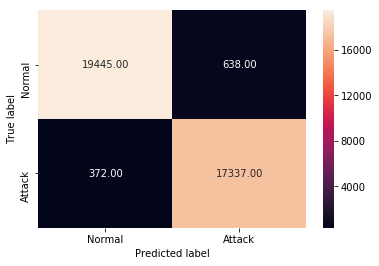

In [140]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_y,logreg.predict(test_x), [0,1] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [76]:
from sklearn.metrics import classification_report
print(classification_report(test_y,logreg.predict(test_x)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     20083
           1       0.96      0.98      0.97     17709

    accuracy                           0.97     37792
   macro avg       0.97      0.97      0.97     37792
weighted avg       0.97      0.97      0.97     37792



    Since the objective of the model is to detect network anamolies as accurately as possible.Currently, our default model      assumes instances with less than 0.5 probability will be normal activity. Hence, we need to calculate the appropriate cut off.

In [77]:
test_predicted_prob=pd.DataFrame(logreg.predict_proba(test_x))[[1]]
test_predicted_prob.columns=['prob']
actual=test_y.reset_index()
actual.drop('index',axis=1,inplace=True)

# making a DataFrame with actual and prob columns
df_test_predict = pd.concat([actual, test_predicted_prob], axis=1)
df_test_predict.columns = ['actual','prob']
df_test_predict.head()

,actual,prob
0,0,0.026269
1,1,0.994293
2,1,0.997182
3,1,0.995442
4,1,0.998919


In [78]:
test_roc_like_df = pd.DataFrame()
test_temp = df_test_predict.copy()

for cut_off in np.linspace(0,1,50):
    test_temp['predicted'] = test_temp['prob'].apply(lambda x: 0 if x < cut_off else 1)
    test_temp['tp'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==1 else 0, axis=1)
    test_temp['fp'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==1 else 0, axis=1)
    test_temp['tn'] = test_temp.apply(lambda x: 1 if x['actual']==0 and x['predicted']==0 else 0, axis=1)
    test_temp['fn'] = test_temp.apply(lambda x: 1 if x['actual']==1 and x['predicted']==0 else 0, axis=1)
    sensitivity = test_temp['tp'].sum() / (test_temp['tp'].sum() + test_temp['fn'].sum())
    specificity = test_temp['tn'].sum() / (test_temp['tn'].sum() + test_temp['fp'].sum())
    
    accuracy=(test_temp['tp'].sum()+test_temp['tn'].sum()) / (test_temp['tp'].sum() + test_temp['fn'].sum()+test_temp['tn'].sum() + test_temp['fp'].sum())
    
    test_roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity,accuracy]).T
    test_roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity','accuracy']
    test_roc_like_df = pd.concat([test_roc_like_df, test_roc_like_table], axis=0)


In [79]:
test_roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.468591
0,0.020408,1.000000,0.812080,0.900138
0,0.040816,0.999887,0.862919,0.927101
0,0.061224,0.999661,0.892197,0.942554
0,0.081633,0.999435,0.909974,0.951895


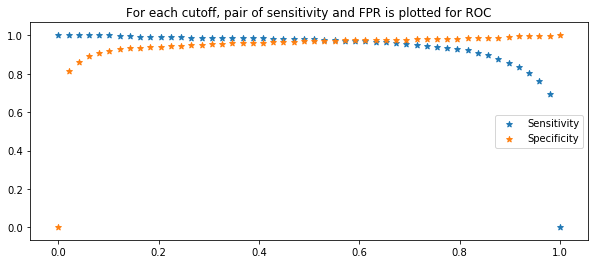

In [80]:
test_temp.sum()
plt.subplots(figsize=(10,4))
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(test_roc_like_df['cutoff'], test_roc_like_df['specificity'], marker='*', label='Specificity')
#plt.scatter(test_roc_like_df['cutoff'], 1-test_roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [81]:
## Finding ideal cut-off for checking if this remains same in OOS validation
test_roc_like_df['total'] = test_roc_like_df['sensitivity'] + test_roc_like_df['specificity']
test_roc_like_df[test_roc_like_df['total']==test_roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.489796,0.979728,0.967684,0.973328,1.947412


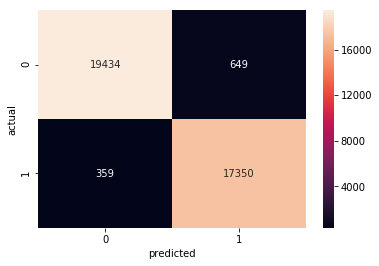

In [82]:
df_test_predict['predicted'] = df_test_predict['prob'].apply(lambda x: 1 if x > 0.489796 else 0)

import seaborn as sns
sns.heatmap(pd.crosstab(df_test_predict['actual'], df_test_predict['predicted']), annot=True, fmt='.0f')

In [83]:
print(classification_report(df_test_predict.actual, df_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     20083
           1       0.96      0.98      0.97     17709

    accuracy                           0.97     37792
   macro avg       0.97      0.97      0.97     37792
weighted avg       0.97      0.97      0.97     37792



In [84]:
accuracy=metrics.accuracy_score(df_test_predict.actual, df_test_predict.predicted)
print('Accuracy: ',round(accuracy,2))

Accuracy:  0.97


### `Goodness of fit`

In [85]:
auc_score = metrics.roc_auc_score( df_test_predict.actual, df_test_predict.predicted  )
round( float( auc_score ), 2 )

0.97

### `Preparing data for multinomial classification`

In [105]:
features=df_rf.columns.difference(['activity'])

df_train2=df_train[features]
df_test2=df_test[features]

In [106]:
df_train2.shape

(125973, 21)

In [107]:
# Concatenating prediction of logistic regression to training and testing dataframes
df_train_prob=pd.DataFrame(logreg.predict_proba(df_train2))[[1]]
df_train_prob.columns=['prob']
df_train_prob['predicted_activity']=df_train_prob['prob'].apply(lambda x: 1 if x > 0.489796 else 0)

df_test_prob=pd.DataFrame(logreg.predict_proba(df_test2))[[1]]
df_test_prob.columns=['prob']
df_test_prob['predicted_activity']=df_test_prob['prob'].apply(lambda x: 1 if x > 0.489796 else 0)

In [108]:
df_train2=pd.concat([df_train2,df_train_prob['predicted_activity'],df_train1['attack_type']],axis=1)
df_test2=pd.concat([df_test2,df_test_prob['predicted_activity'],df_test1['attack_type']],axis=1)

    attack_type has actual names. Before we can use it, we need to convert each attack type into a digit.
    So, in this case there are 5 categories which have been coded 0,1,2,3,4 
    {'Normal_activity':0,'DOS':1,'Probe':2,'R2L':3,'U2R':4}

In [109]:
di2={'Normal_activity':0,'DOS':1,'Probe':2,'R2L':3,'U2R':4}

df_train2['attack_type']=df_train2['attack_type'].map(di2)
df_test2['attack_type']=df_test2['attack_type'].map(di2)

In [110]:
df_train2.head(5)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_serror_rate,flag_S0,...,protocol_type_tcp,same_srv_rate,serror_rate,service_ecr_i,service_http,service_private,src_bytes,srv_serror_rate,predicted_activity,attack_type
0,2,0.00,0.0,150,0.03,0.17,0.17,25,0.00,0,...,1,1.00,0.0,0,0,0,491.0,0.0,0,0
1,13,0.15,0.0,255,0.60,0.88,0.00,1,0.00,0,...,0,0.08,0.0,0,0,0,146.0,0.0,1,0
2,123,0.07,0.0,255,0.05,0.00,0.10,26,1.00,1,...,1,0.05,1.0,0,0,1,0.0,1.0,1,1
3,5,0.00,8153.0,30,0.00,0.03,1.00,255,0.01,0,...,1,1.00,0.2,0,1,0,232.0,0.2,0,0
4,30,0.00,420.0,255,0.00,0.00,1.00,255,0.00,0,...,1,1.00,0.0,0,1,0,199.0,0.0,0,0


In [111]:
print(df_train2.attack_type.value_counts())
print(df_test2.attack_type.value_counts())

0    67343
1    45927
2    11656
3      995
4       52
Name: attack_type, dtype: int64
0    9711
1    7167
3    3178
2    2421
4      67
Name: attack_type, dtype: int64


### `Splitting the data into training & testing`

In [112]:
feature_columns=df_train2.columns.difference(['attack_type'])

train_x,test_x,train_y,test_y=train_test_split(df_train2[feature_columns],
                                              df_train2['attack_type'],
                                              test_size=.3,
                                              random_state=42)

### `Data balancing`

In [113]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [114]:
col_x=pd.DataFrame(train_x).columns.tolist()
col_y=pd.DataFrame(train_y).columns.tolist()

In [115]:
ros=RandomOverSampler(random_state=42)
balanced_x,balanced_y=ros.fit_sample(train_x,train_y)

In [116]:
train_x=pd.DataFrame(balanced_x,columns=col_x)
train_y=pd.DataFrame(balanced_y,columns=col_y)

In [117]:
train_y.attack_type.value_counts()

4    47260
3    47260
2    47260
1    47260
0    47260
Name: attack_type, dtype: int64

## `Training RandomForest Model`

In [99]:
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# random_grid = {'n_estimators': n_estimators}
# tree=RandomizedSearchCV(RandomForestClassifier(oob_score=False,warm_start=True),random_grid,cv=5,n_jobs=-1)
# tree.fit(train_x,train_y)

In [100]:
# tree.best_params_

In [ ]:
param_grid={'n_estimators':[100,200,300,400,500,600]}

# param_grid={'n_estimators':np.arange(10,100)}
tree=GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True),param_grid,cv=5,n_jobs=-1)
tree.fit(train_x,train_y)  

In [ ]:
tree.best_params_

In [119]:
radm_clf=RandomForestClassifier(oob_score=True,n_estimators=100,n_jobs=-1,random_state=42)
radm_clf.fit(train_x,train_y)

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [120]:
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,radm_clf.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,radm_clf.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.9986240474174428
train_accuracy:  0.9999957680914092


In [123]:
print(classification_report(test_y,radm_clf.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20083
           1       1.00      1.00      1.00     13825
           2       1.00      1.00      1.00      3540
           3       0.97      0.97      0.97       327
           4       0.71      0.71      0.71        17

    accuracy                           1.00     37792
   macro avg       0.93      0.93      0.93     37792
weighted avg       1.00      1.00      1.00     37792

